In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

In [2]:
customer = pd.read_csv('C:/Venkat/Data Science/Python/Case Study/Python Foundation Case Study 1 - Retail Case Study/Customer.csv')
transaction = pd.read_csv('C:/Venkat/Data Science/Python/Case Study/Python Foundation Case Study 1 - Retail Case Study/Transactions.csv')
product_info = pd.read_csv('C:/Venkat/Data Science/Python/Case Study/Python Foundation Case Study 1 - Retail Case Study/prod_cat_info.csv')

## 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [5]:
product_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [6]:
transaction.rename(columns = {'cust_id':'customer_Id'}, inplace = True)
product_info.rename(columns = {'prod_sub_cat_code':'prod_subcat_code'}, inplace = True)

In [7]:
trans_prod = pd.merge(left = transaction, right = product_info, on = ["prod_cat_code","prod_subcat_code"], how = "left")

In [8]:
Customer_Final = pd.merge(left = trans_prod, right = customer, on = 'customer_Id', how = 'left')

In [9]:
Customer_Final

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0


In [10]:
Customer_Final.dtypes

transaction_id        int64
customer_Id           int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
DOB                  object
Gender               object
city_code           float64
dtype: object

In [11]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

In [12]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'])

## 2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types

In [13]:
Customer_Final.dtypes

transaction_id               int64
customer_Id                  int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

### b. Top/Bottom 10 observations

In [14]:
Customer_Final.head(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,1982-09-10,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,1971-04-11,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,1979-11-27,F,3.0


In [15]:
Customer_Final.tail(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,1976-10-08,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,1991-12-10,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,1982-01-15,M,1.0


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [16]:
Customer_Final.describe()

,transaction_id,customer_Id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


### d. Frequency tables for all the categorical variables

In [17]:
Customer_Final.loc[:,Customer_Final.dtypes=='object'].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23053,23053,23053,23044
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9311,6069,3048,11811


## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.
### a. Continuous variables(Seperating continuous variable from Customer_Final)

In [18]:
continuous_variable = Customer_Final.loc[:,['Qty', 'Rate', 'Tax', 'total_amt']]

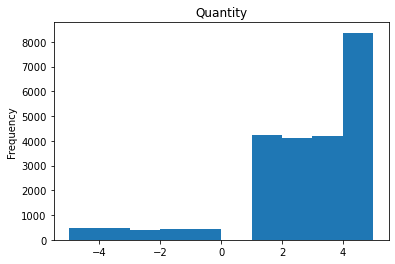

In [19]:
continuous_variable['Qty'].plot(kind = 'hist')
plt.title('Quantity')
plt.show()

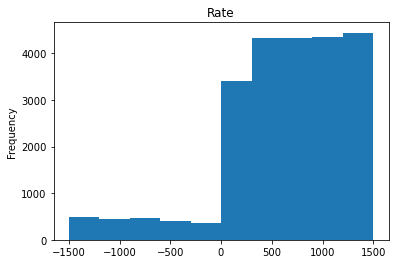

In [20]:
continuous_variable['Rate'].plot(kind = 'hist')
plt.title('Rate')
plt.show()

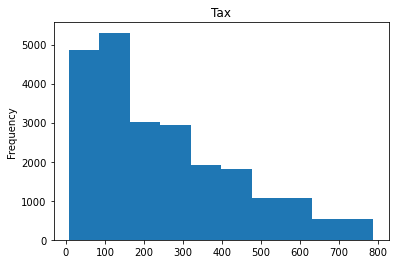

In [21]:
continuous_variable['Tax'].plot(kind = 'hist')
plt.title('Tax')
plt.show()

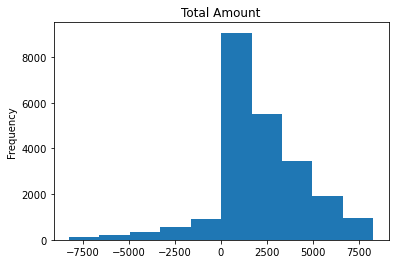

In [22]:
continuous_variable['total_amt'].plot(kind = 'hist')
plt.title('Total Amount')
plt.show()

### b. Categorical Variables (Seperating Categorical variables from Customer_Final)

In [23]:
categorical_variable = Customer_Final.loc[:,Customer_Final.dtypes=='object']

In [24]:
categorical_variable.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


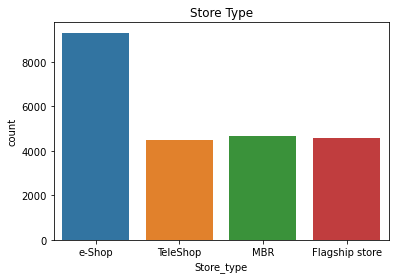

In [25]:
sns.countplot(x = categorical_variable['Store_type'])
plt.title('Store Type')
plt.show()

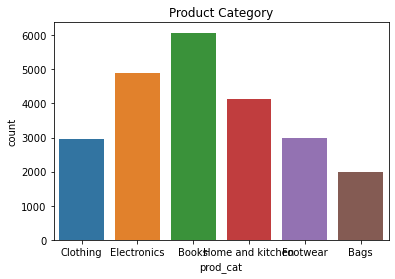

In [26]:
sns.countplot(x = categorical_variable['prod_cat'])
plt.title('Product Category')
plt.show()

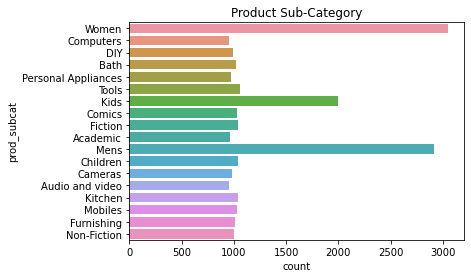

In [27]:
sns.countplot(y = categorical_variable['prod_subcat'])
plt.title('Product Sub-Category')
plt.show()

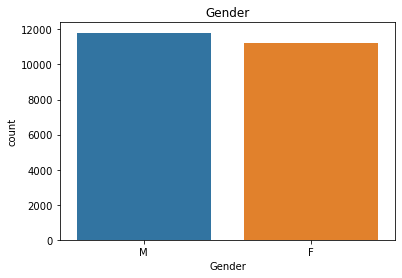

In [28]:
sns.countplot(x = categorical_variable['Gender'])
plt.title('Gender')
plt.show()

## 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data

In [29]:
start_date = pd.Timestamp.strftime(Customer_Final['tran_date'].min(),format='%d-%m-%Y')
end_date = pd.Timestamp.strftime(Customer_Final['tran_date'].max(),format='%d-%m-%Y')

In [30]:
print('Time period of Transaction is from ' + start_date + ' to ' + end_date)

Time period of Transaction is from 02-01-2011 to 02-12-2014


### b. Count of transactions where the total amount of transaction was negative

In [31]:
count_negative_trans = Customer_Final.loc[Customer_Final['total_amt'] < 0, 'transaction_id'].count()

In [32]:
print('Count of transaction where the total amount of transaction was negative is',count_negative_trans)

Count of transaction where the total amount of transaction was negative is 2177


## 5. Analyze which product categories are more popular among females vs male customers.

In [33]:
popular_cat = Customer_Final.pivot_table(index = 'Gender', values = 'Qty', columns = 'prod_cat', aggfunc = 'count')

In [34]:
popular_cat

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,994,2949,1439,2328,1529,1994
M,1004,3116,1518,2570,1469,2134


## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [35]:
max_cust = Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending = False)

In [36]:
max_cust

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: customer_Id, dtype: int64

In [37]:
percent_max_cust = round((max_cust.iloc[0] / max_cust.sum()) *100,3)

In [38]:
print('City code 4.0 has maximum customers with percentage of', percent_max_cust)

City code 4.0 has maximum customers with percentage of 10.51


## 7. Which store type sells the maximum products by value and by quantity?

In [39]:
Customer_Final.pivot_table(values = ['Qty', 'Rate'], columns = 'Store_type', aggfunc = 'sum').T.sort_values(by ='Qty', ascending = False)

,Qty,Rate
Store_type,,
e-Shop,22763,5941001
MBR,11194,2953253
Flagship store,11133,2941557
TeleShop,10984,2834420


## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship stores?

In [40]:
store_cat = Customer_Final.pivot_table(index = 'prod_cat', columns = 'Store_type', values = 'total_amt', aggfunc = 'sum')
store_cat

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1616300.075
Books,2488205.850,2496039.195,2545005.060,5293443.935
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107514.565,1973338.835,4426474.195
Footwear,1234806.560,1112163.715,1235719.290,2637084.710
Home and kitchen,1712567.675,1822403.570,1579702.475,3324319.570


In [41]:
round(store_cat.loc[['Clothing', 'Electronics'], 'Flagship store'].sum(),3)

3409559.27

## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [42]:
gender_cat = Customer_Final.pivot_table(index = 'prod_cat', columns = 'Gender', values = 'total_amt', aggfunc = 'sum')
gender_cat

Gender,F,M
prod_cat,,
Bags,2077985.650,2046722.990
Books,6164692.235,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5703109.425
Footwear,3202552.990,3014672.050
Home and kitchen,4132177.335,4301075.480


In [43]:
round(gender_cat.loc['Electronics', 'M'].sum(),3)

5703109.425

## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [44]:
positive_trans = Customer_Final.loc[Customer_Final['total_amt'] > 0, ::]
distinct_trans = positive_trans.pivot_table(index = ['customer_Id'], values = 'transaction_id', aggfunc = 'count')
distinct_trans = distinct_trans[distinct_trans.transaction_id>10].reset_index()
distinct_trans

,customer_Id,transaction_id
0,266794,11
1,270535,11
2,270803,11
3,272741,11
4,273014,11
5,274227,11


In [45]:
print('There are',distinct_trans.shape[0], 'customers with more than 10 unique transactions')

There are 6 customers with more than 10 unique transactions


## 11. For all customers aged between 25 - 35, find out:

In [46]:
now = pd.Timestamp('now')
Customer_Final['Age'] = (now - Customer_Final['DOB']).astype('<m8[Y]')

In [47]:
Customer_25to35 = Customer_Final[(Customer_Final['Age'] >= 25) & (Customer_Final['Age'] <= 35)]

In [48]:
Customer_25to35

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,Age
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0,35.0
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,1989-08-17,M,10.0,32.0
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,1992-02-01,F,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,Clothing,Kids,1989-04-14,F,6.0,33.0
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,Electronics,Cameras,1989-09-23,M,4.0,32.0
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,Clothing,Kids,1992-11-24,M,9.0,29.0
23038,61812307223,274306,2011-01-25,4,4,4,1447,607.740,6395.740,e-Shop,Bags,Women,1989-12-01,M,2.0,32.0


### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [49]:
Customer_25to35_EB = Customer_25to35.pivot_table(index = 'prod_cat', values = 'total_amt', aggfunc = 'sum')
Customer_25to35_EB

,total_amt
prod_cat,
Bags,1154354.825
Books,3531538.010
Clothing,2010505.510
Electronics,3212001.845
Footwear,1890356.650
Home and kitchen,2492233.575


In [50]:
round(Customer_25to35_EB.loc[['Books', 'Electronics'], 'total_amt'].sum(),3)

6743539.855

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [51]:
Customer_25to35

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,Age
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0,35.0
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,1989-08-17,M,10.0,32.0
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,1992-02-01,F,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,Clothing,Kids,1989-04-14,F,6.0,33.0
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,Electronics,Cameras,1989-09-23,M,4.0,32.0
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,Clothing,Kids,1992-11-24,M,9.0,29.0
23038,61812307223,274306,2011-01-25,4,4,4,1447,607.740,6395.740,e-Shop,Bags,Women,1989-12-01,M,2.0,32.0


In [52]:
Customer_25to35_JM = Customer_25to35[(Customer_25to35['tran_date'] >= '2014-01-01') & (Customer_25to35['tran_date'] <= '2014-03-01')]
total_amount = round(Customer_25to35_JM['total_amt'].sum(),2)

In [53]:
print('Total amount spend by customers between 1st January, 2014 and 1st March, 2014 is', total_amount)

Total amount spend by customers between 1st January, 2014 and 1st March, 2014 is 470178.6
